<a href="https://colab.research.google.com/github/priontu/Unsupervised-Learning-Analysis-of-Transfer-Learning-Based-Features/blob/main/generatePCAplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow import keras
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

%matplotlib inline
# dir(keras.applications) #Checking which engines are available/possible

trainSet, info = tfds.load(name = 'oxford_flowers102', split = 'train + validation', as_supervised = True, with_info = True)
validSet = tfds.load(name='oxford_flowers102', split='test[90%:]', as_supervised=True)
testSet = tfds.load(name='oxford_flowers102', split = 'test[:90%]', as_supervised=True)

def preprocessWithAspectRatio(image, label):
  resized_image=tf.image.resize_with_pad(image, 299, 299)
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

trainPipe=trainSet.map(preprocessWithAspectRatio, num_parallel_calls=32).batch(32).prefetch(1)
validPipe = validSet.map(preprocessWithAspectRatio, num_parallel_calls=32).batch(32).prefetch(1)
testPipe = testSet.map(preprocessWithAspectRatio, num_parallel_calls=32).batch(32).prefetch(1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteNFN5G6/oxford_flowers102-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteNFN5G6/oxford_flowers102-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteNFN5G6/oxford_flowers102-validation.tfrecord…

Dataset oxford_flowers102 downloaded and prepared to ~/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [ ]:
f_path = "/content/gdrive/My Drive/oxFLowersMod-botFit.h5"
# pretrained_model = keras.models.load_model(f_path)
pretrained_model = keras.applications.xception.Xception(weights = "imagenet", include_top = False)

# pretrained_minus_top = keras.models.Sequential(pretrained_model.layers[:-2]) ##This or my trained model?

# pretrained_minus_top

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# base_model

In [ ]:
avg = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)
output = keras.layers.Dense(info.features['label'].num_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=pretrained_model.inputs, outputs=output)

64/64 [==============================] - 638s 10s/step


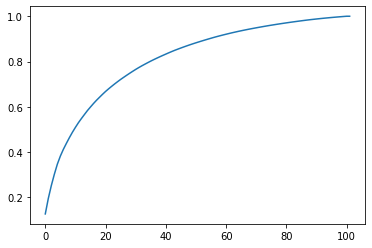

In [ ]:
for x, y in testPipe.unbatch().batch(2048).take(1):
  probPreds = model.predict(x)

pca = PCA()
pca.fit(probPreds)
exp_var_rat = pca.explained_variance_ratio_

y_cords = np.cumsum(exp_var_rat)
x_cords = np.arange(y_cords.size)

plt.plot(x_cords, y_cords)
plt.show()



In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('oxFLowersMod-topFit.h5', save_best_only=True)

earlyStop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)
ss=5e-1
# ss = 5
optimizer = keras.optimizers.SGD(learning_rate=ss)

# model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
# model.fit(testPipe, validation_data= validPipe, epochs = 25, callbacks=[checkpoint_cb, earlyStop_cb])


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(..)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete69IWH0/oxford_flowers102-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete69IWH0/oxford_flowers102-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete69IWH0/oxford_flowers102-validation.tfrecord…

Dataset oxford_flowers102 downloaded and prepared to ~/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
64/64 [==============================] - 740s 12s/step


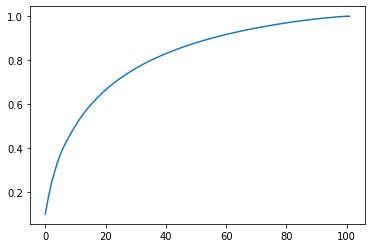

In [ ]:
from tensorflow import keras
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# dir(keras.applications) #Checking which engines are available/possible

trainSet, info = tfds.load(name = 'oxford_flowers102', split = 'train + validation', as_supervised = True, with_info = True)
validSet = tfds.load(name='oxford_flowers102', split='test[90%:]', as_supervised=True)
testSet = tfds.load(name='oxford_flowers102', split = 'test[:90%]', as_supervised=True)

def preprocess(image, label):
  resized_image=tf.image.resize_with_pad(image, 299, 299)
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

trainPipe=trainSet.map(preprocess, num_parallel_calls=32).batch(32).prefetch(1)
validPipe = validSet.map(preprocess, num_parallel_calls=32).batch(32).prefetch(1)
testPipe = testSet.map(preprocess, num_parallel_calls=32).batch(32).prefetch(1)

pretrained_model = keras.applications.xception.Xception(weights = "imagenet", include_top = False)
avg = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)
output = keras.layers.Dense(info.features['label'].num_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=pretrained_model.inputs, outputs=output)

for x, y in testPipe.unbatch().batch(2048).take(1):
  probPreds = model.predict(x)

pca = PCA()
pca.fit(probPreds)
exp_var_rat = pca.explained_variance_ratio_

y_cords = np.cumsum(exp_var_rat)
x_cords = np.arange(y_cords.size)

plt.plot(x_cords, y_cords)
plt.show()

